In [138]:
import sqlalchemy as db
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import calendar

In [2]:
engine1 = db.create_engine('mysql+pymysql://root:@localhost:3306/hotwheels_db')
con1 =engine1.connect()
meta =db.MetaData()

In [3]:
pd.read_sql("select * from customers", con1)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,None,Philadelphia,PA,71270,USA,1323.0,72600.0
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.0
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.0
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188.0,85100.0


In [4]:
# Soal II.1

query = "select c.customerName, pd.productName, od.quantityOrdered, od.priceEach, (od.quantityOrdered*od.priceEach) as totalPrice"
query += " from customers c join payments p  on c.customerNumber = p.customerNumber join orders o on c.customerNumber=o.customerNumber join orderdetails od on o.orderNumber=od.orderNumber join products pd on pd.productCode=od.productCode where p.paymentDate = '2003-06-05' limit 4"

orderdate = pd.read_sql(query, con1)
orderdate

,customerName,productName,quantityOrdered,priceEach,totalPrice
0,Atelier graphique,1965 Aston Martin DB5,26,120.71,3138.46
1,Atelier graphique,1999 Indy 500 Monte Carlo SS,46,114.84,5282.64
2,Atelier graphique,1948 Porsche Type 356 Roadster,34,117.26,3986.84
3,Atelier graphique,1966 Shelby Cobra 427 S/C,50,43.27,2163.50


In [5]:
#soal II.2

query1 = "select o.orderNumber, c.customerName, c.city, c.country, sum(od.quantityOrdered*od.priceEach) as totalPurchase"
query1 += " from customers c join orders o on c.customerNumber = o.customerNumber join orderdetails od on o.orderNumber=od.orderNumber group by o.orderNumber order by totalPurchase desc limit 10"

orderdate1 = pd.read_sql(query1, con1)
orderdate1

,orderNumber,customerName,city,country,totalPurchase
0,10165,"Dragon Souveniers, Ltd.",Singapore,Singapore,67392.85
1,10287,"Vida Sport, Ltd",Genève,Switzerland,61402.00
2,10310,"Toms Spezialitäten, Ltd",Köln,Germany,61234.67
3,10212,Euro+ Shopping Channel,Madrid,Spain,59830.55
4,10207,Diecast Collectables,Boston,USA,59265.14
5,10127,Muscle Machine Inc,NYC,USA,58841.35
6,10204,Muscle Machine Inc,NYC,USA,58793.53
7,10126,"Corrida Auto Replicas, Ltd",Madrid,Spain,57131.92
8,10222,Collectable Mini Designs Co.,San Diego,USA,56822.65
9,10142,Mini Gifts Distributors Ltd.,San Rafael,USA,56052.56


In [6]:
query2 = "select p.productName as mostWanted2003, sum(od.quantityOrdered) as quantityOrdered"
query2 += " from products p join orderdetails od on p.productCode=od.productCode join orders o on o.orderNumber=od.orderNumber where o.orderDate < '2004-01-01' group by mostWanted2003 order by quantityOrdered desc limit 10"

orderdate2 = pd.read_sql(query2, con1)
orderdate2

,mostWanted2003,quantityOrdered
0,1992 Ferrari 360 Spider red,672.0
1,1936 Mercedes-Benz 500K Special Roadster,429.0
2,1964 Mercedes Tour Bus,427.0
3,1940s Ford truck,408.0
4,1926 Ford Fire Engine,393.0
5,1956 Porsche 356A Coupe,389.0
6,1965 Aston Martin DB5,382.0
7,1948 Porsche Type 356 Roadster,382.0
8,1996 Peterbilt 379 Stake Bed with Outrigger,373.0
9,1950's Chicago Surface Lines Streetcar,372.0


In [7]:
##Data Visualization Test

In [8]:
collision = pd.read_csv('collision_data.csv') 

In [9]:
collision.head()

,Unnamed: 0,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N
1,1,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N
2,2,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N
3,3,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N
4,4,2,Matched,Block,Injury Collision,Head On,2,0,0,2,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N


In [10]:
collision.describe()

,Unnamed: 0,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE
count,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000
mean,49987.500000,1.324328,2.438305,0.044581,0.035919,1.964361,14.283308,0.050212,22.058154
std,28860.729593,0.468125,1.421063,0.216829,0.187214,0.584710,6.840410,0.218383,14.804548
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24993.750000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,0.000000,10.000000
50%,49987.500000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,0.000000,14.000000
75%,74981.250000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,0.000000,32.000000
max,99975.000000,2.000000,57.000000,6.000000,2.000000,12.000000,69.000000,1.000000,88.000000


In [17]:
collision.columns

Index(['Unnamed: 0', 'SEVERITYCODE', 'STATUS', 'ADDRTYPE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'HITPARKEDCAR'],
      dtype='object')

## Soal III.1

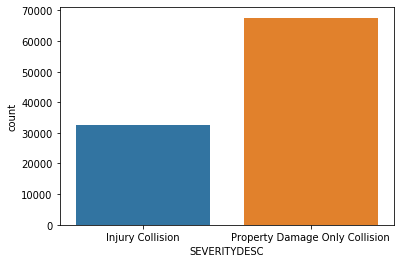

In [11]:
sns.countplot(collision['SEVERITYDESC'])
plt.show()

In [13]:
collision['SEVERITYDESC'].value_counts(normalize=True)*100

Property Damage Only Collision    67.567216
Injury Collision                  32.432784
Name: SEVERITYDESC, dtype: float64

### Berdasarkan perhitungan dan plot diatas dapat disimpulkan bahwa kecelakaan dengan kategory Property Damage Only Collision lebih tinggi daripada Injury Collision. Hal ini dapat terlihat dari nilai rasio Property Damage Only Collision sebesar 67.56% dan Injury Collision sebesar sisanya yakni 32.44%

## Soal III.2

In [78]:
# PERSONCOUNT

print('Nilai Mean =',collision['PERSONCOUNT'].mean())
print('Nilai Median =',collision['PERSONCOUNT'].median())
print('Nilai Mode =',collision['PERSONCOUNT'].mode())
print('Nilai Stdev =',collision['PERSONCOUNT'].std())


Nilai Mean = 2.438305193246379
Nilai Median = 2.0
Nilai Mode = 0    2
dtype: int64
Nilai Stdev = 1.421062813248801


In [93]:
q1 = collision['PERSONCOUNT'].describe()['25%']
q2 = collision['PERSONCOUNT'].describe()['50%']
q3 = collision['PERSONCOUNT'].describe()['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Nilai IQR =', iqr)
print('Nilai lowerbound =', lower_bound)
print('Nilai upperbound =', upper_bound)

Nilai IQR = 1.0
Nilai lowerbound = 0.5
Nilai upperbound = 4.5


In [94]:
stats.skewtest(collision['PERSONCOUNT'])

SkewtestResult(statistic=285.6435450184219, pvalue=0.0)

In [77]:
#PEDCOUNT

print('Nilai Mean =',collision['PEDCOUNT'].mean())
print('Nilai Median =',collision['PEDCOUNT'].median())
print('Nilai Mode =',collision['PEDCOUNT'].mode())
print('Nilai Stdev =',collision['PEDCOUNT'].std())

Nilai Mean = 0.04458069936784828
Nilai Median = 0.0
Nilai Mode = 0    0
dtype: int64
Nilai Stdev = 0.21682894623920368


In [96]:
q1 = collision['PEDCOUNT'].describe()['25%']
q2 = collision['PEDCOUNT'].describe()['50%']
q3 = collision['PEDCOUNT'].describe()['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Nilai IQR =', iqr)
print('Nilai lowerbound =', lower_bound)
print('Nilai upperbound =', upper_bound)


Nilai IQR = 0.0
Nilai lowerbound = 0.0
Nilai upperbound = 0.0


In [97]:
stats.skewtest(collision['PEDCOUNT'])

SkewtestResult(statistic=272.38392305290154, pvalue=0.0)

In [81]:
#PEDCYLCOUNT

print('Nilai Mean =',collision['PEDCYLCOUNT'].mean())
print('Nilai Median =',collision['PEDCYLCOUNT'].median())
print('Nilai Mode =',collision['PEDCYLCOUNT'].mode())
print('Nilai Stdev =',collision['PEDCYLCOUNT'].std())

Nilai Mean = 0.03591862046891254
Nilai Median = 0.0
Nilai Mode = 0    0
dtype: int64
Nilai Mean = 0.18721358009008263


In [82]:
q1 = collision['PEDCYLCOUNT'].describe()['25%']
q2 = collision['PEDCYLCOUNT'].describe()['50%']
q3 = collision['PEDCYLCOUNT'].describe()['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Nilai IQR =', iqr)
print('Nilai lowerbound =', lower_bound)
print('Nilai upperbound =', upper_bound)

Nilai IQR = 0.0
Nilai lowerbound = 0.0
Nilai upperbound = 0.0


In [98]:
stats.skewtest(collision['PEDCYLCOUNT'])

SkewtestResult(statistic=266.5101042396131, pvalue=0.0)

In [85]:
#VEHCOUNT

print('Nilai Mean =',collision['VEHCOUNT'].mean())
print('Nilai Median =',collision['VEHCOUNT'].median())
print('Nilai Mode =',collision['VEHCOUNT'].mode())
print('Nilai Stdev =',collision['VEHCOUNT'].std())

Nilai Mean = 1.9643614467472192
Nilai Median = 2.0
Nilai Mode = 0    2
dtype: int64
Nilai Stdev = 0.5847099022292137


In [83]:
q1 = collision['VEHCOUNT'].describe()['25%']
q2 = collision['VEHCOUNT'].describe()['50%']
q3 = collision['VEHCOUNT'].describe()['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Nilai IQR =', iqr)
print('Nilai lowerbound =', lower_bound)
print('Nilai upperbound =', upper_bound)

Nilai IQR = 0.0
Nilai lowerbound = 2.0
Nilai upperbound = 2.0


In [99]:
stats.skewtest(collision['VEHCOUNT'])

SkewtestResult(statistic=148.14664363358742, pvalue=0.0)

## Soal III.3

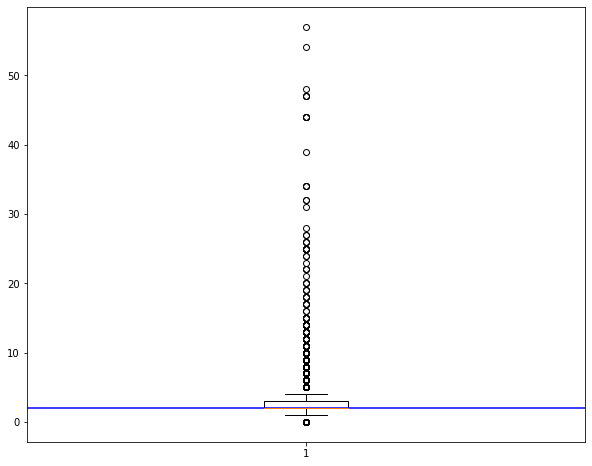

In [113]:
plt.figure(figsize=(10,8))
plt.boxplot(collision['PERSONCOUNT'])
plt.axhline(collision['PERSONCOUNT'].median(), color='blue')
# plt.axvline(scollision['PERSONCOUNT'].median(), color='blue')
# plt.axvline(ser.mode().values, color='red')
plt.show()

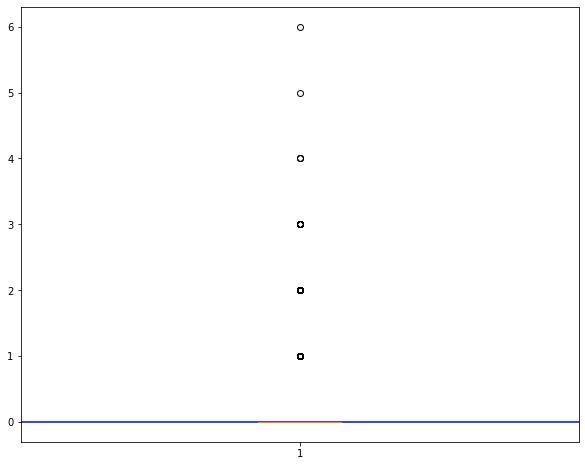

In [115]:
plt.figure(figsize=(10,8))
plt.boxplot(collision['PEDCOUNT'])
plt.axhline(collision['PEDCOUNT'].median(), color='blue')
# plt.axvline(scollision['PERSONCOUNT'].median(), color='blue')
# plt.axvline(ser.mode().values, color='red')
plt.show()

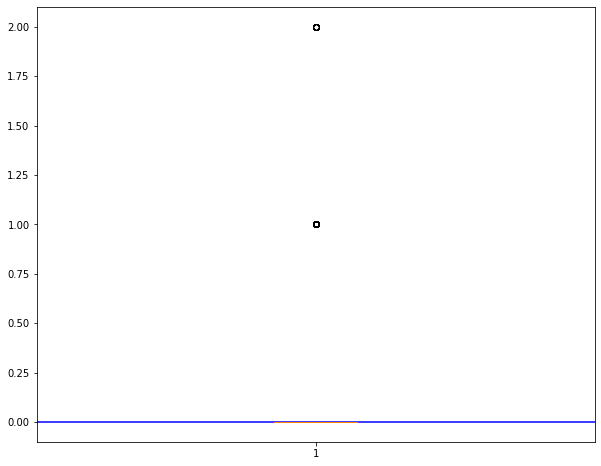

In [117]:
plt.figure(figsize=(10,8))
plt.boxplot(collision['PEDCYLCOUNT'])
plt.axhline(collision['PEDCYLCOUNT'].median(), color='blue')
# plt.axvline(scollision['PERSONCOUNT'].median(), color='blue')
# plt.axvline(ser.mode().values, color='red')
plt.show()

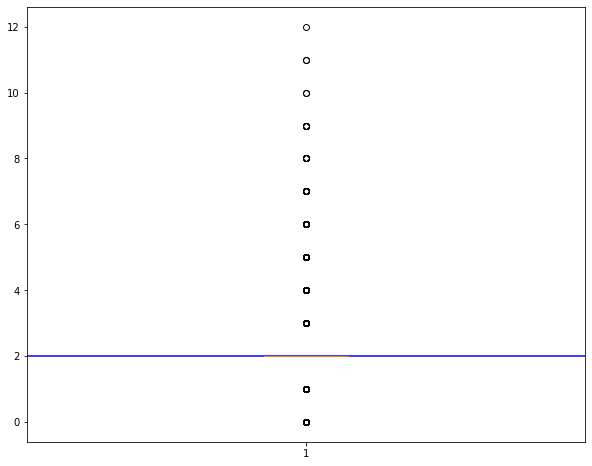

In [118]:
plt.figure(figsize=(10,8))
plt.boxplot(collision['VEHCOUNT'])
plt.axhline(collision['VEHCOUNT'].median(), color='blue')
# plt.axvline(scollision['PERSONCOUNT'].median(), color='blue')
# plt.axvline(ser.mode().values, color='red')
plt.show()

## berdasarkan hasil skewness test , kesemua kolom memiliki nilai skewness yang tinggi. Skewness yang bernilai positif berarti ekor distribusi berada di sebelah kanan nilai terbanyak.

In [119]:
SOAL III.4

SyntaxError: invalid syntax (<ipython-input-119-b6339085434e>, line 1)

In [139]:
collision['INCDATE']

0        2013-03-27 00:00:00+00:00
1        2013-03-29 00:00:00+00:00
2        2019-04-20 00:00:00+00:00
3        2020-04-15 00:00:00+00:00
4        2013-03-31 00:00:00+00:00
                   ...            
99971    2018-11-12 00:00:00+00:00
99972    2018-12-18 00:00:00+00:00
99973    2019-01-19 00:00:00+00:00
99974    2019-01-15 00:00:00+00:00
99975    2018-11-30 00:00:00+00:00
Name: INCDATE, Length: 99976, dtype: object

In [176]:
collision['year'] = pd.DatetimeIndex(collision['INCDATE']).year
collision['hour'] = pd.DatetimeIndex(collision['INCDATE']).hour
collision.columns


collision['year']

0        2013
1        2013
2        2019
3        2020
4        2013
         ... 
99971    2018
99972    2018
99973    2019
99974    2019
99975    2018
Name: year, Length: 99976, dtype: int64

In [ ]:
plt.pie(collision['hour'], labels=collision['SEVERITYDESC'], autopct='%.2f')
plt.show()

In [186]:
Soal III.5

SyntaxError: invalid syntax (<ipython-input-186-86dbe2b46f8b>, line 1)

In [151]:
a= pd.DataFrame({'TIME' : ['00:00 to 04:00', '04:00 to 08:00', '08:00 to 12:00', '12:00 to 16:00', '16:00 to 20:00', '20:00 to 00:00']},
             index=['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

ValueError: need at least one array to concatenate

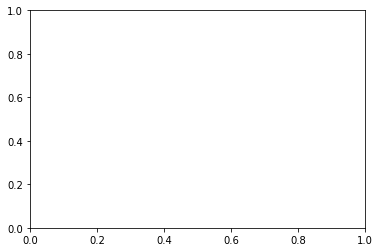

In [155]:
plt.stackplot(a, )

plt.xlabel('Times')
plt.ylabel('Serenitydesc')


plt.show()

Berdasarkan data diatas kecelakaan yang sering terjadi diatas pukul 00.00 adalah kecelakaan dengan kategori Property Damage Collision

soal III.6

Text(0.5, 1.0, 'Collision count YoY')

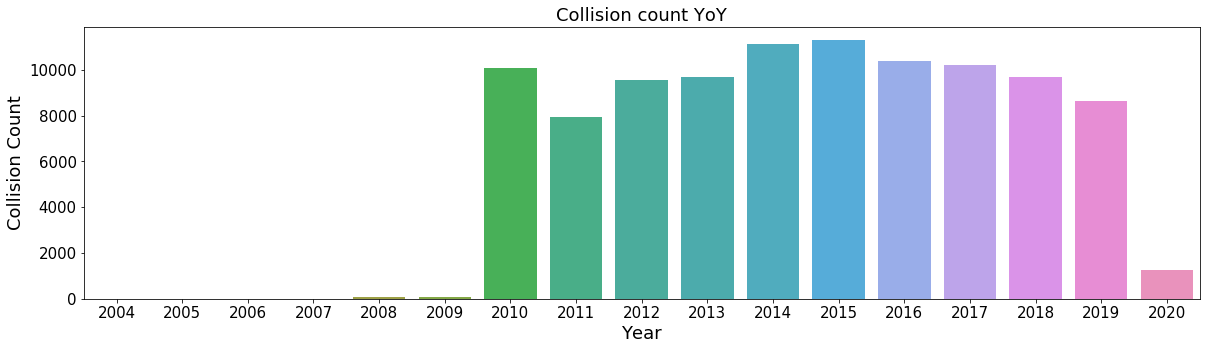

In [179]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(collision["year"],ax=ax)
ax.set_xlabel('Year', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count YoY", fontsize=18)


## Tidak setuju karena berdasarkan plot diatas justru tahun 2015 terjadinya banyak kecelakaan bukan ditahun 2011